<a href="https://colab.research.google.com/github/AnishmMore/-Alpha-blending/blob/main/Alpha_blending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!unzip BaggageAI_CV_Hiring_Assignment.zip

In [ ]:
cd /content/BaggageAI_CV_Hiring_Assignment/threat_images

/content/BaggageAI_CV_Hiring_Assignment/threat_images


In [ ]:
cd threat_images/

[Errno 2] No such file or directory: 'threat_images/'
/content/BaggageAI_CV_Hiring_Assignment/threat_images


Reading the images and creating the alpha channeling of threat object

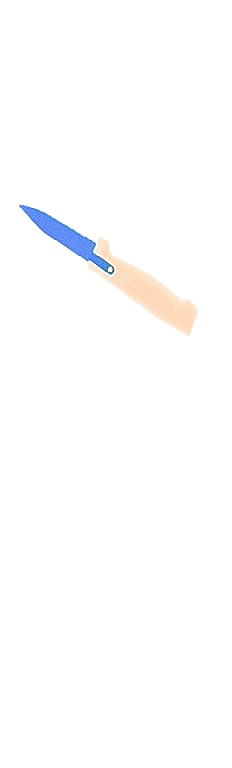

-1

In [ ]:
import cv2
import numpy as np

def process(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_canny = cv2.Canny(img_gray, 12, 54)
    kernel = np.ones((3, 3))
    img_dilate = cv2.dilate(img_canny, kernel, iterations=10)
    img_erode = cv2.erode(img_dilate, kernel, iterations=8)
    return img_erode

img = cv2.imread("BAGGAGE_20170522_113049_80428_A.jpg")
contours, _ = cv2.findContours(process(img), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, contours, -1, (255, 255, 255), 2)
cv2_imshow(img)
cv2.waitKey(0)


In [ ]:
# img= cv2.imread("BAGGAGE_20170522_113049_80428_A.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)


-32.00538635253906
-12.994613647460938


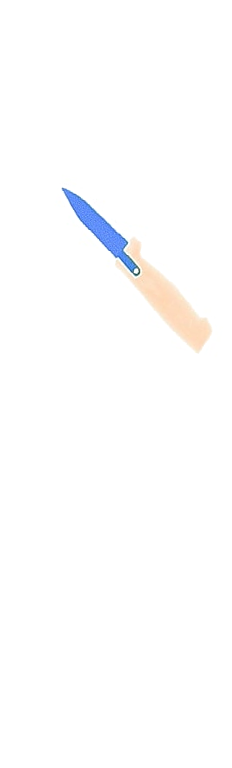

True

In [ ]:
coords = np.column_stack(np.where(thresh > 0))

#This function gives the rectangle border containing the whole text area, and the rotation angle of this border is the same as that of the text in the figure
angle = cv2.minAreaRect(coords)[-1]
print(angle)
angle = -(45+angle)
h, w = img.shape[:2]
center = (w//2, h//2)
print(angle)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
cv2_imshow(rotated)
cv2.imwrite("rotate.png",rotated)

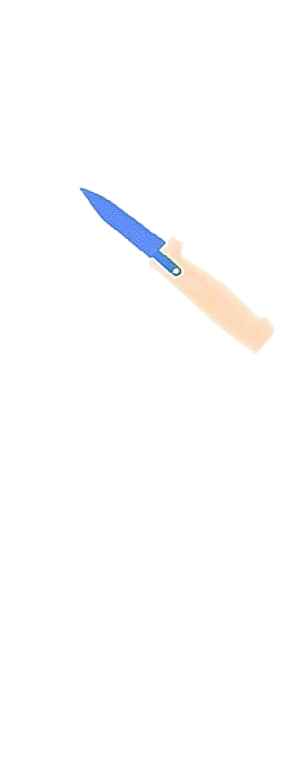

(768, 300, 3)

In [ ]:
new_width = 300
dim_size = (new_width, rotated.shape[0])

horizon_img = cv2.resize(rotated, dim_size, interpolation=cv2.INTER_AREA)
cv2.imwrite('dice1.png',horizon_img)
cv2_imshow(horizon_img)
horizon_img.shape

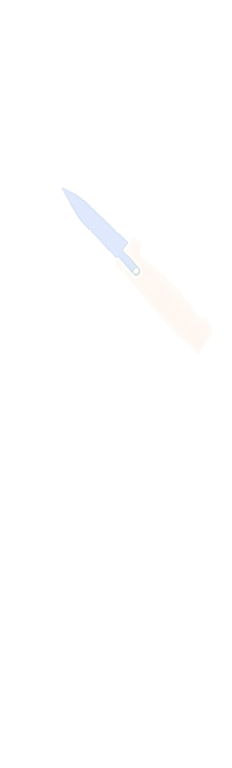

True

In [ ]:
img=cv2.imread("rotate.png")
b_channel, g_channel, r_channel = cv2.split(img)
# alpha_channel = np.ones(b_channel.shape, dtype=b_channel.dtype) * 50 #creating a dummy alpha channel image.
alpha_channel = alpha_channel.astype(np.uint8)
img_BGRA = cv2.merge((b_channel, g_channel, r_channel, alpha_channel))
cv2_imshow(img_BGRA)
cv2.imwrite("img_bgra.png",img_BGRA)

Alpha blending of threat to background image


In [ ]:
cd ..


/content/BaggageAI_CV_Hiring_Assignment


In [ ]:
cd background_images/

/content/BaggageAI_CV_Hiring_Assignment/background_images


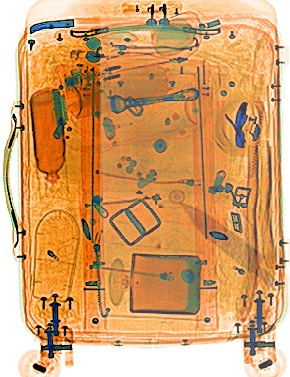

In [ ]:
background = cv2.imread('BAGGAGE_20180811_175323_83216_B_1.jpg')
overlay = cv2.imread('img_bgra.png',-1)
def overlay_transparent(background, overlay, x, y):

    background_width = background.shape[1]
    background_height = background.shape[0]

    if x >= background_width or y >= background_height:
        return background

    h, w = overlay.shape[0], overlay.shape[1]

    if x + w > background_width:
        w = background_width - x
        overlay = overlay[:, :w]

    if y + h > background_height:
        h = background_height - y
        overlay = overlay[:h]

    if overlay.shape[2] < 4:
        overlay = np.concatenate(
            [
                overlay,
                np.ones((overlay.shape[0], overlay.shape[1], 1), dtype = overlay.dtype) * 255
            ],
            axis = 2,
        )

    overlay_image = overlay[..., :3]
    mask = overlay[..., 3:] / 255.0

    background[y:y+h, x:x+w] = (1.0 - mask) * background[y:y+h, x:x+w] + mask * overlay_image

    return background
out = overlay_transparent(background, overlay, x=100, y=15)
cv2_imshow(out) 

True

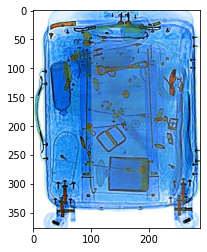

In [ ]:
def transparentOverlay(src , overlay , pos=(0,0),scale = 1):
    """
    :param src: Input Color Background Image
    :param overlay: transparent Image (BGRA)
    :param pos:  position where the image to be blit.
    :param scale : scale factor of transparent image.
    :return: Resultant Image
    """
    overlay = cv2.resize(overlay,(0,0),fx=scale,fy=scale)
    h,w,_ = overlay.shape  # Size of foreground
    rows,cols,_ = src.shape  # Size of background Image
    y,x = pos[0],pos[1]    # Position of foreground/overlay image
    
    #loop over all pixels and apply the blending equation
    for i in range(h):
        for j in range(w):
            if x+i >= rows or y+j >= cols:
                continue
            alpha = float(overlay[i][j][3]/255.0) # read the alpha channel 
            src[x+i][y+j] = alpha*overlay[i][j][:3]+(1-alpha)*src[x+i][y+j]
    return src

# read all images
bImg = cv2.imread("BAGGAGE_20180811_175323_83216_B_1.jpg")

# KeyPoint : Remember to use cv2.IMREAD_UNCHANGED flag to load the image with alpha channel
overlayImage = cv2.imread("img_bgra.png" ,cv2.IMREAD_UNCHANGED)

# Overlay transparent images at desired postion(x,y) and Scale. 
result = transparentOverlay(bImg,overlayImage,(100,50),0.7)

#Display the result 
#cv2.namedWindow("Result",cv2.WINDOW_NORMAL)
plt.imshow(result)
cv2.imwrite("result.png",result)

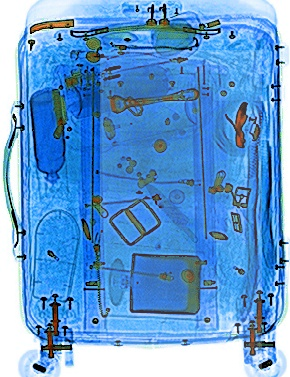

In [ ]:
newres=cv2.imread("result.png")
newres = cv2.cvtColor(newres, cv2.COLOR_BGR2RGB)
cv2_imshow(newres)

Original Image

In [ ]:
cd ..

/content/BaggageAI_CV_Hiring_Assignment


In [ ]:
cd background_images/

/content/BaggageAI_CV_Hiring_Assignment/background_images


(377, 290, 3)

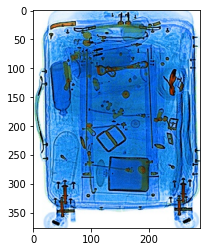

In [ ]:
img1 = cv2.imread("BAGGAGE_20180811_175323_83216_B_1.jpg")
plt.imshow(img1)
img1.shape